In [2]:
import pandas as pd
import numpy as np
import h5py

In [3]:
# read in "hand-score" freezeframe data 
freeze_data = pd.read_csv('/Users/novak/Documents/Columbia/mentored_research/Turi/els git/els_project/notebooks/novak_analyses/combined_freezeframe_data.csv')
freeze_data['freeze'] = freeze_data['freeze'].astype(int)
freeze_data.head()

,t(sec),motion_index,freeze,cohort_id,day
0,0.57,122.88,0,ptsd2_91,recall1
1,0.80,186.29,0,ptsd2_91,recall1
2,1.07,393.09,0,ptsd2_91,recall1
3,1.34,215.13,0,ptsd2_91,recall1
4,1.60,125.65,0,ptsd2_91,recall1


In [11]:
# read in moseq data from h5 file 
file_path = '/Users/novak/Documents/Columbia/mentored_research/Turi/els git/els_project/notebooks/novak_analyses/validation_moseq.h5'

all_data = []

with h5py.File(file_path, 'r') as hdf:
    for group_name in hdf.keys():
        group_data = hdf[group_name]
        
        centroid = group_data['centroid'][:]
        heading = group_data['heading'][:]
        latent_state = group_data['latent_state'][:]
        syllable = group_data['syllable'][:]
        
        df = pd.DataFrame({
            'centroid_x': centroid[:, 0],
            'centroid_y': centroid[:, 1],
            'heading': heading,
            'syllable': syllable
        })
        
        latent_df = pd.DataFrame(latent_state, columns=[f'latent_{i}' for i in range(latent_state.shape[1])])
        df = pd.concat([df, latent_df], axis=1)
        
        df['cohort_id'] = group_name
        
        all_data.append(df)

moseq = pd.concat(all_data, ignore_index=True)
freeze_syllable = [1,2,3]
# moseq['moseq_freeze'] = [1 if x in freeze_syllable else 0 for x in moseq['syllable']]
moseq.head()

,centroid_x,centroid_y,heading,syllable,latent_0,latent_1,latent_2,latent_3,cohort_id
0,66.916234,113.047757,-1.630713,1,2.172469,2.026579,-4.272476,0.932398,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...
1,68.553199,113.446614,1.554392,1,-0.834760,1.863691,0.522967,2.321068,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...
2,68.278483,113.783455,1.851333,1,0.303540,0.215593,0.433516,1.073463,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...
3,67.878551,113.234163,1.985545,1,0.244257,0.214718,0.564223,0.487337,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...
4,67.634957,110.926941,2.079929,1,0.150186,0.165919,0.619528,0.001479,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...


In [21]:
moseq_ptsd2_91_recall1 = moseq[moseq['cohort_id'] == 'ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000']
moseq_ptsd2_91_recall1['moseq_freeze'] = [1 if x in freeze_syllable else 0 for x in moseq_ptsd2_91_recall1['syllable']]
moseq_ptsd2_91_recall1.head()

/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_74042/2899707180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moseq_ptsd2_91_recall1['moseq_freeze'] = [1 if x in freeze_syllable else 0 for x in moseq_ptsd2_91_recall1['syllable']]


,centroid_x,centroid_y,heading,syllable,latent_0,latent_1,latent_2,latent_3,cohort_id,moseq_freeze
0,66.916234,113.047757,-1.630713,1,2.172469,2.026579,-4.272476,0.932398,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,1
1,68.553199,113.446614,1.554392,1,-0.834760,1.863691,0.522967,2.321068,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,1
2,68.278483,113.783455,1.851333,1,0.303540,0.215593,0.433516,1.073463,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,1
3,67.878551,113.234163,1.985545,1,0.244257,0.214718,0.564223,0.487337,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,1
4,67.634957,110.926941,2.079929,1,0.150186,0.165919,0.619528,0.001479,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,1


In [22]:
freeze_ptsd2_91_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd2_91') & (freeze_data['day'] == 'recall1')]
freeze_ptsd2_91_recall1.head()

,t(sec),motion_index,freeze,cohort_id,day
0,0.57,122.88,0,ptsd2_91,recall1
1,0.80,186.29,0,ptsd2_91,recall1
2,1.07,393.09,0,ptsd2_91,recall1
3,1.34,215.13,0,ptsd2_91,recall1
4,1.60,125.65,0,ptsd2_91,recall1


In [46]:
def plot_ethogram_v6(freeze_df, moseq_df, freeze_col='freeze', moseq_col='moseq_freeze', 
                     freeze_label='FreezeFrame', moseq_label='KPMS'):
    """
    Plots an ethogram comparing freeze and moving states between two models with a normalized time axis.
    Uses softer colors and adds dark outlines between each row for clarity.
    
    Parameters:
    - freeze_df: DataFrame containing the FreezeFrame data.
    - moseq_df: DataFrame containing the KPMS data.
    - freeze_col: Column name in freeze_df representing the freeze states (default is 'freeze').
    - moseq_col: Column name in moseq_df representing the freeze states (default is 'moseq_freeze').
    - freeze_label: Label for the FreezeFrame data (default is 'FreezeFrame').
    - moseq_label: Label for the KPMS data (default is 'KPMS').
    """
    import matplotlib.pyplot as plt
    import numpy as np

    freeze_len = len(freeze_df)
    moseq_len = len(moseq_df)

    # Create percentage-based x-axis instead of absolute number of frames 
    freeze_percentage = (freeze_df.index / freeze_len) * 100
    moseq_percentage = (moseq_df.index / moseq_len) * 100

    fig, ax = plt.subplots(figsize=(10, 4))

    moving_color = "#F08080"  
    freeze_color = "#4682B4"  

    # Plot FreezeFrame data
    ax.fill_between(freeze_percentage, 0, 1, color=moving_color, alpha=0.5)
    ax.fill_between(freeze_percentage, 0, 1, where=(freeze_df[freeze_col] == 1), 
                    step='post', color=freeze_color, alpha=0.8)

    # Plot KPMS data
    ax.fill_between(moseq_percentage, 1, 2, color=moving_color, alpha=0.5)
    ax.fill_between(moseq_percentage, 1, 2, where=(moseq_df[moseq_col] == 1), 
                    step='post', color=freeze_color, alpha=0.8)

    # Add black outlines for each row
    for y in [0, 1, 1, 2]:
        ax.plot([0, 100], [y, y], color='black', linewidth=1.5)

    # Set labels and titles
    ax.set_yticks([0.45, 1.55])
    ax.set_yticklabels([freeze_label, moseq_label])
    ax.set_xlabel("Time (%)")
    ax.set_title("Ethogram: {} vs {}".format(freeze_label, moseq_label))

    plt.tight_layout()
    plt.show()



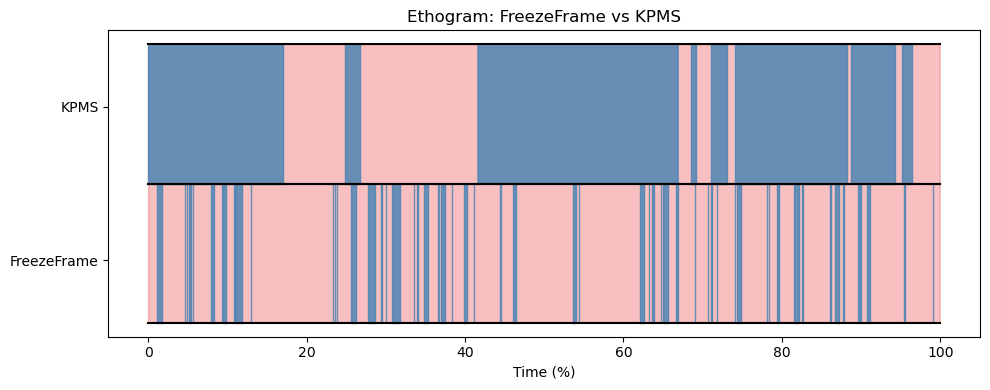

In [47]:
plot_ethogram_v6(freeze_ptsd2_91_recall1, moseq_ptsd2_91_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')